In [1]:

import matplotlib.pyplot as plt  # 导入 matplotlib包
import numpy as np  # 导入 numpy包
from scipy.integrate import odeint  # 导入 scipy.integrate 模块

### 不同微分方程模型的仿真模拟
SI模型，SIR模型，SEIR模型

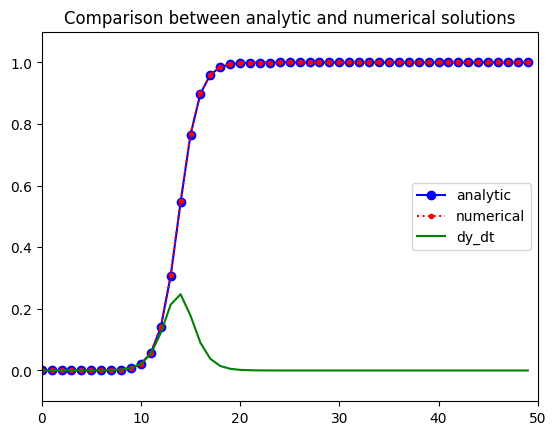

In [2]:
# 设置模型参数
number = 1e7  # 总人数
lamda = 1.0  # 日接触率, 患病者每天有效接触的易感者的平均人数
mu1 = 0.5  # 日治愈率, 每天被治愈的患病者人数占患病者总数的比例
y0 = i0 = 1e-6  # 患病者比例的初值
tEnd = 50  # 预测日期长度
t = np.arange(0.0, tEnd, 1)  # (start,stop,step)


def dy_dt(y, t):  # 定义导数函数 f(y,t)
    dy_dt = lamda * y * (1 - y)  # di/dt = lamda*i*(1-i)
    return dy_dt


yAnaly = 1 / (1 + (1 / i0 - 1) * np.exp(-lamda * t))  # 微分方程的解析解
yInteg = odeint(dy_dt, y0, t)  # 求解微分方程初值问题
yDeriv = lamda * yInteg * (1 - yInteg)

# 绘图
plt.plot(t, yAnaly, '-ob', label='analytic')
plt.plot(t, yInteg, ':.r', label='numerical')
plt.plot(t, yDeriv, '-g', label='dy_dt')
plt.title("Comparison between analytic and numerical solutions")
plt.legend(loc='right')
plt.axis([0, 50, -0.1, 1.1])
plt.show()


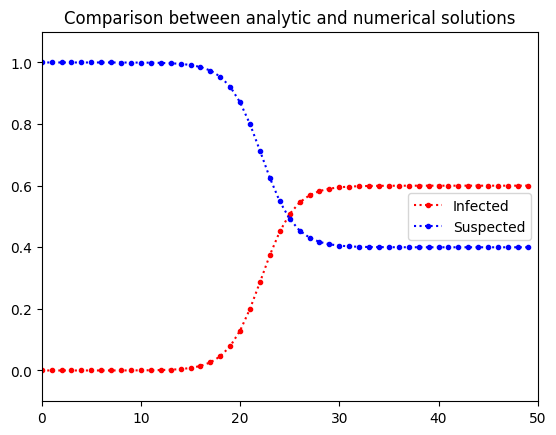

In [4]:
# 设置模型参数
number = 1e7  # 总人数
lamda = 1.0  # 日接触率, 患病者每天有效接触的易感者的平均人数
mu1 = 0.4  # 日恢复率, 每天恢复的患病者人数占患病者总数的比例
y0 = i0 = 1e-6  # 患病者比例的初值
tEnd = 50  # 预测日期长度
t = np.arange(0.0, tEnd, 1)  # (start,stop,step)


def SIS(y, t):  # 定义导数函数 f(y,t)
    dy_dt = lamda * y * (1 - y) - mu1 * y  # di/dt = lamda*i*(1-i)
    return dy_dt


yInteg = odeint(SIS, y0, t)  # 求解微分方程初值问题

# 绘图
plt.plot(t, yInteg, ':.r', label='Infected')
plt.plot(t, 1 - yInteg, ':.b', label='Suspected')
plt.title("Comparison between analytic and numerical solutions")
plt.legend(loc='right')
plt.axis([0, 50, -0.1, 1.1])
plt.show()

lamda=0.2	mu=0.08	sigma=2.5	(1-1/sig)=0.6


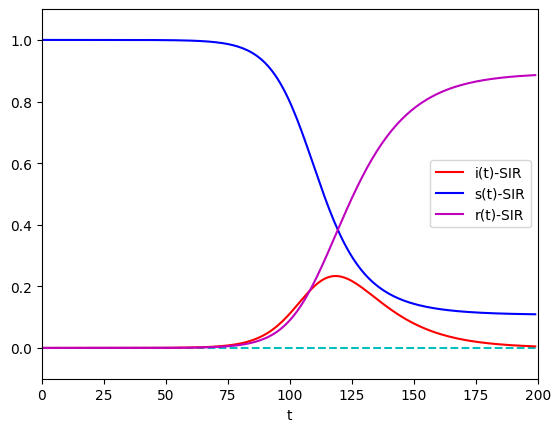

In [5]:
def dySIR(y, t, lamda, mu):  # SIR 模型，导数函数
    i, s = y
    di_dt = lamda * s * i - mu * i  # di/dt = lamda*s*i-mu*i
    ds_dt = -lamda * s * i  # ds/dt = -lamda*s*i
    return [di_dt, ds_dt]


# 设置模型参数
number = 1e7  # 总人数
lamda = 0.2  # 日接触率, 患病者每天有效接触的易感者的平均人数
sigma = 2.5  # 传染期接触数
mu = lamda / sigma  # 日治愈率, 每天被治愈的患病者人数占患病者总数的比例
fsig = 1 - 1 / sigma
tEnd = 200  # 预测日期长度
t = np.arange(0.0, tEnd, 1)  # (start,stop,step)
i0 = 1e-6  # 患病者比例的初值
s0 = 1 - i0  # 易感者比例的初值
Y0 = (i0, s0)  # 微分方程组的初值

print("lamda={}\tmu={}\tsigma={}\t(1-1/sig)={}".format(lamda, mu, sigma, fsig))

ySIR = odeint(dySIR, Y0, t, args=(lamda, mu))  # SIR 模型

# 绘图
#plt.title("Comparison among SI, SIS and SIR models")
plt.xlabel('t')
plt.axis([0, tEnd, -0.1, 1.1])
plt.axhline(y=0, ls="--", c='c')  # 添加水平直线
plt.plot(t, ySIR[:, 0], '-r', label='i(t)-SIR')
plt.plot(t, ySIR[:, 1], '-b', label='s(t)-SIR')
plt.plot(t, 1 - ySIR[:, 0] - ySIR[:, 1], '-m', label='r(t)-SIR')
plt.legend(loc='best')  # youcans
plt.show()

lamda=0.3	mu=0.06	sigma=5.0	(1-1/sig)=0.8


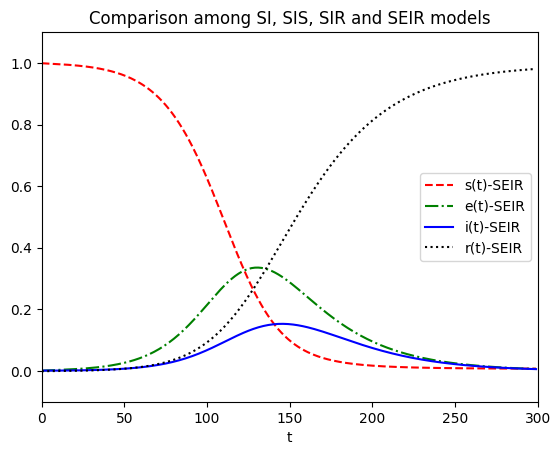

In [6]:
def dySEIR(y, t, lamda, delta, mu):  # SEIR 模型，导数函数
    s, e, i = y  # youcans
    ds_dt = -lamda * s * i  # ds/dt = -lamda*s*i
    de_dt = lamda * s * i - delta * e  # de/dt = lamda*s*i - delta*e
    di_dt = delta * e - mu * i  # di/dt = delta*e - mu*i
    return np.array([ds_dt, de_dt, di_dt])


# 设置模型参数
number = 1e5  # 总人数
lamda = 0.3  # 日接触率, 患病者每天有效接触的易感者的平均人数
delta = 0.03  # 日发病率，每天发病成为患病者的潜伏者占潜伏者总数的比例
mu = 0.06  # 日治愈率, 每天治愈的患病者人数占患病者总数的比例
sigma = lamda / mu  # 传染期接触数
fsig = 1 - 1 / sigma
tEnd = 300  # 预测日期长度
t = np.arange(0.0, tEnd, 1)  # (start,stop,step)
i0 = 1e-3  # 患病者比例的初值
e0 = 1e-3  # 潜伏者比例的初值
s0 = 1 - i0  # 易感者比例的初值
Y0 = (s0, e0, i0)  # 微分方程组的初值

# odeint 数值解，求解微分方程初值问题
ySEIR = odeint(dySEIR, Y0, t, args=(lamda, delta, mu))  # SEIR 模型

# 输出绘图
print("lamda={}\tmu={}\tsigma={}\t(1-1/sig)={}".format(lamda, mu, sigma, fsig))
plt.title("Comparison among SI, SIS, SIR and SEIR models")
plt.xlabel('t')
plt.axis([0, tEnd, -0.1, 1.1])

plt.plot(t, ySEIR[:, 0], '--', color='r', label='s(t)-SEIR')
plt.plot(t, ySEIR[:, 1], '-.', color='g', label='e(t)-SEIR')
plt.plot(t, ySEIR[:, 2], '-', color='b', label='i(t)-SEIR')
plt.plot(t, 1 - ySEIR[:, 0] - ySEIR[:, 1] - ySEIR[:, 2], ':', color='k', label='r(t)-SEIR')
plt.legend(loc='right')  # youcans
plt.show()


lamda=0.3	mu=0.06	sigma=5.0	(1-1/sig)=0.8


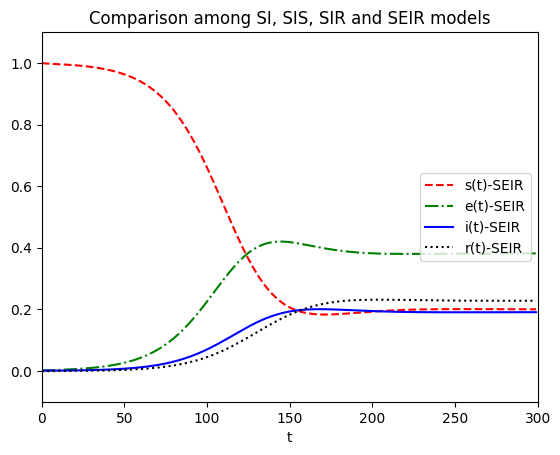

In [9]:
recover = 0.05


def dySEIRS(y, t, lamda, delta, mu):  # SEIR 模型，导数函数
    s, e, i, r = y  # youcans
    ds_dt = -lamda * s * i + recover * r  # ds/dt = -lamda*s*i
    de_dt = lamda * s * i - delta * e  # de/dt = lamda*s*i - delta*e
    di_dt = delta * e - mu * i  # di/dt = delta*e - mu*i
    dr_dt = mu * i - recover * r
    return np.array([ds_dt, de_dt, di_dt, dr_dt])


# 设置模型参数
number = 1e5  # 总人数
lamda = 0.3  # 日接触率, 患病者每天有效接触的易感者的平均人数
delta = 0.03  # 日发病率，每天发病成为患病者的潜伏者占潜伏者总数的比例
mu = 0.06  # 日治愈率, 每天治愈的患病者人数占患病者总数的比例
sigma = lamda / mu  # 传染期接触数
fsig = 1 - 1 / sigma
tEnd = 300  # 预测日期长度
t = np.arange(0.0, tEnd, 1)  # (start,stop,step)
i0 = 1e-3  # 患病者比例的初值
e0 = 1e-3  # 潜伏者比例的初值
s0 = 1 - i0  # 易感者比例的初值
r0 = 0
Y0 = (s0, e0, i0, r0)  # 微分方程组的初值

# odeint 数值解，求解微分方程初值问题
ySEIR = odeint(dySEIRS, Y0, t, args=(lamda, delta, mu))  # SEIR 模型

# 输出绘图
print("lamda={}\tmu={}\tsigma={}\t(1-1/sig)={}".format(lamda, mu, sigma, fsig))
plt.title("Comparison among SI, SIS, SIR and SEIR models")
plt.xlabel('t')
plt.axis([0, tEnd, -0.1, 1.1])

plt.plot(t, ySEIR[:, 0], '--', color='r', label='s(t)-SEIR')
plt.plot(t, ySEIR[:, 1], '-.', color='g', label='e(t)-SEIR')
plt.plot(t, ySEIR[:, 2], '-', color='b', label='i(t)-SEIR')
plt.plot(t, 1 - ySEIR[:, 0] - ySEIR[:, 1] - ySEIR[:, 2], ':', color='k', label='r(t)-SEIR')
plt.legend(loc='right')  # youcans
plt.show()


lamda=0.3	mu=0.06	sigma=5.0	(1-1/sig)=0.8


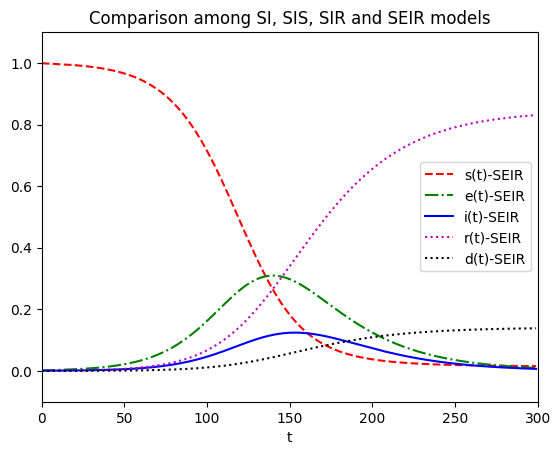

In [10]:
death = 0.01


def dySEIRD(y, t, lamda, delta, mu):  # SEIR 模型，导数函数
    s, e, i, r, d = y  # youcans
    ds_dt = -lamda * s * i  # ds/dt = -lamda*s*i
    de_dt = lamda * s * i - delta * e  # de/dt = lamda*s*i - delta*e
    di_dt = delta * e - mu * i - death * i  # di/dt = delta*e - mu*i
    dr_dt = mu * i
    dd_dt = death * i
    return np.array([ds_dt, de_dt, di_dt, dr_dt, dd_dt])


# 设置模型参数
number = 1e5  # 总人数
lamda = 0.3  # 日接触率, 患病者每天有效接触的易感者的平均人数
delta = 0.03  # 日发病率，每天发病成为患病者的潜伏者占潜伏者总数的比例
mu = 0.06  # 日治愈率, 每天治愈的患病者人数占患病者总数的比例
sigma = lamda / mu  # 传染期接触数
fsig = 1 - 1 / sigma
tEnd = 300  # 预测日期长度
t = np.arange(0.0, tEnd, 1)  # (start,stop,step)
i0 = 1e-3  # 患病者比例的初值
e0 = 1e-3  # 潜伏者比例的初值
s0 = 1 - i0  # 易感者比例的初值
Y0 = (s0, e0, i0, 0, 0)  # 微分方程组的初值

# odeint 数值解，求解微分方程初值问题
ySEIR = odeint(dySEIRD, Y0, t, args=(lamda, delta, mu))  # SEIR 模型

# 输出绘图
print("lamda={}\tmu={}\tsigma={}\t(1-1/sig)={}".format(lamda, mu, sigma, fsig))
plt.title("Comparison among SI, SIS, SIR and SEIR models")
plt.xlabel('t')
plt.axis([0, tEnd, -0.1, 1.1])

plt.plot(t, ySEIR[:, 0], '--', color='r', label='s(t)-SEIR')
plt.plot(t, ySEIR[:, 1], '-.', color='g', label='e(t)-SEIR')
plt.plot(t, ySEIR[:, 2], '-', color='b', label='i(t)-SEIR')
plt.plot(t, ySEIR[:, 3], ':', color='m', label='r(t)-SEIR')
plt.plot(t, ySEIR[:, 4], ':', color='k', label='d(t)-SEIR')
plt.legend(loc='right')  # youcans
plt.show()


### 捕食者模型

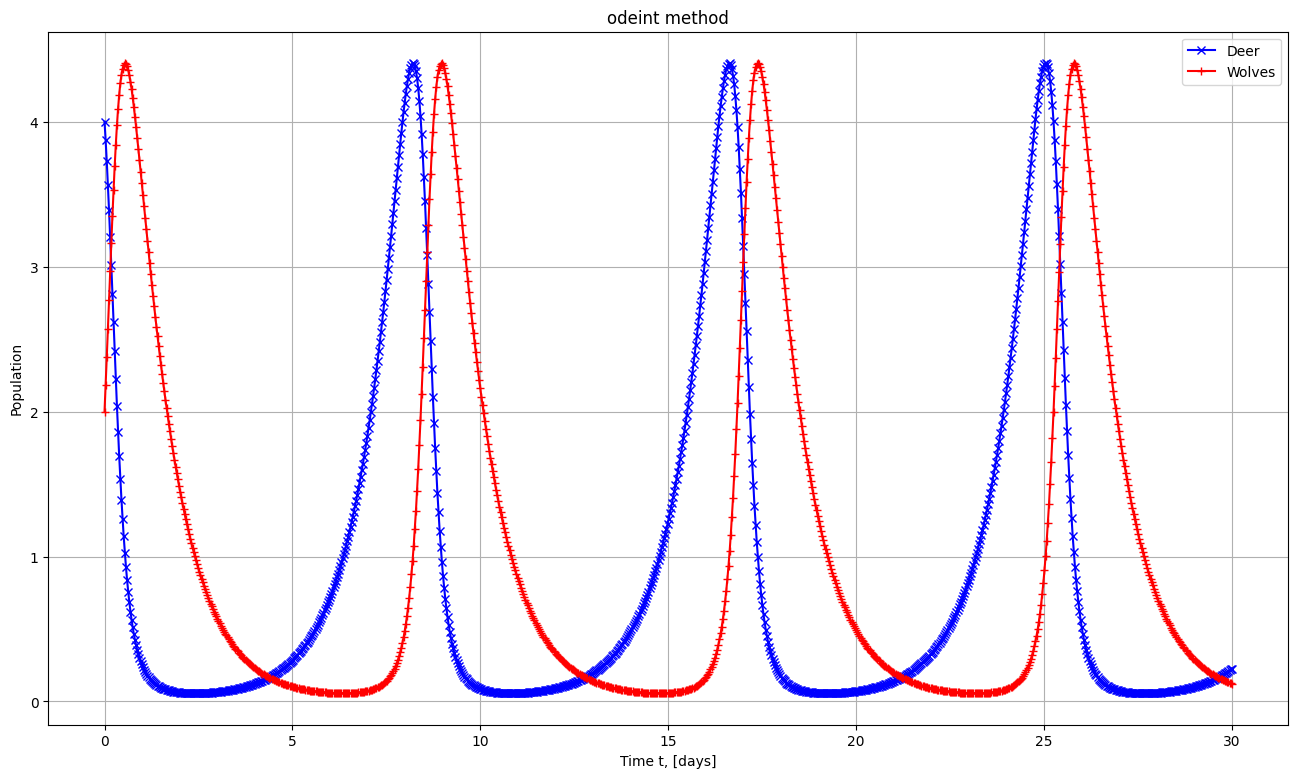

In [11]:
alpha = 1.  #mortality rate due to predators
beta = 1.
delta = 1.
gamma = 1.
x0 = 4.
y0 = 2.


def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])


Nt = 1000
tmax = 30.
t = np.linspace(0., tmax, Nt)
X0 = [x0, y0]
res = odeint(derivative, X0, t, args=(alpha, beta, delta, gamma))
x, y = res.T

plt.figure(figsize=(16, 9))
plt.grid()
plt.title("odeint method")
plt.plot(t, x, 'xb-', label='Deer')
plt.plot(t, y, '+r-', label="Wolves")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()
plt.show()

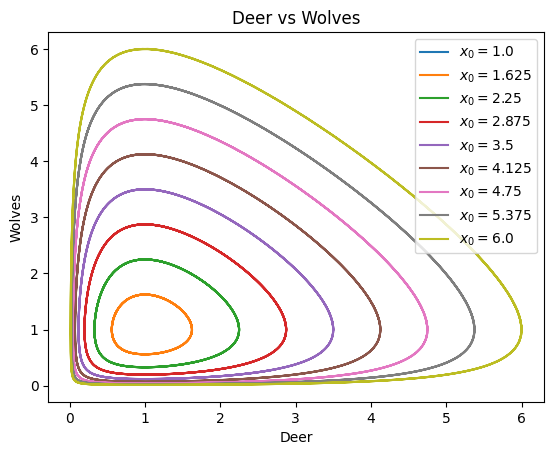

In [12]:
plt.figure()
IC = np.linspace(1.0, 6.0, 9)  # initial conditions for deer population (prey)
# np.linspace和arange不同，从1.0开始，到6.0结束，均分为9段
for deer in IC:
    X0 = [deer, 1.0]
    Xs = odeint(derivative, X0, t, args=(alpha, beta, delta, gamma))
    plt.plot(Xs[:, 0], Xs[:, 1], "-", label="$x_0 =$" + str(X0[0]))
plt.xlabel("Deer")
plt.ylabel("Wolves")
plt.legend()
plt.title("Deer vs Wolves")
plt.show()